ENG

1- Overview of the data and statistical summary

2- Correlation analysis

3- Splitting the data into training and test sets

4- Standardization

5- Building an SVR model (initially with RBF kernel)

6- Evaluating model performance

7- Optional: Hyperparameter tuning (grid search)

TR

1- Veriye genel bakış ve istatistiksel özet

2- Korelasyon analizi

3- Veriyi eğitim/test setine ayırma

4- Standardizasyon

5- SVR modeli kurma (başlangıçta RBF kernel ile)

6- Model performansını değerlendirme

7- İsteğe bağlı olarak hiperparametre ayarı (grid search)

### Variables/Değişkenler
fixed acidity – Sabit asidite

volatile acidity – Uçucu asidite

citric acid – Sitrik asit

residual sugar – Artık şeker

chlorides – Klorürler

free sulfur dioxide – Serbest kükürt dioksit

total sulfur dioxide – Toplam kükürt dioksit

density – Yoğunluk

pH – pH değeri

sulphates – Sülfatlar

alcohol – Alkol oranı

quality – Şarap kalitesi

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv("wineQualityReds.csv")
df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
df.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1599 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1599 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


C:\Users\brfnm\AppData\Local\Temp\ipykernel_15556\1412092167.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="quality", data=df, palette="viridis")


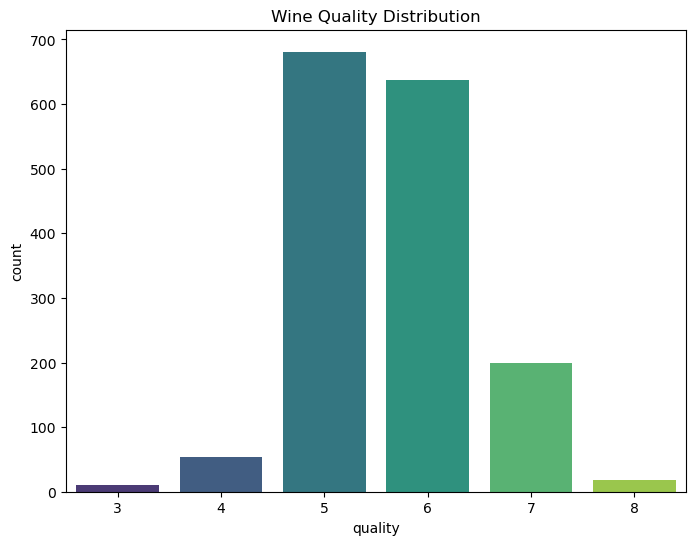

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x="quality", data=df, palette="viridis")
plt.title("Wine Quality Distribution")
plt.show()

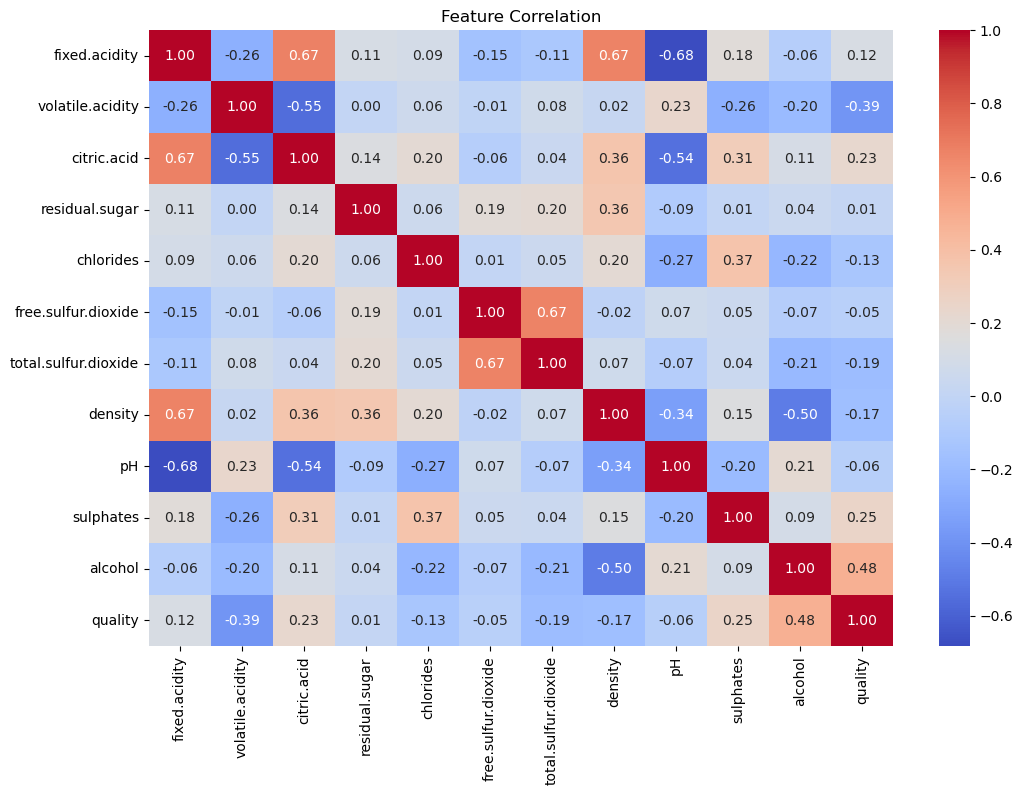

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation")
plt.show()

In [20]:
X = df.drop("quality", axis=1)
y = df["quality"]               

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1279, 11), (320, 11), (1279,), (320,))

In [21]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [22]:
svr=SVR(kernel="rbf", C=1.0, epsilon=0.2)
svr.fit(X_train_scaled, y_train)

SVR(epsilon=0.2)

In [23]:
y_pred=svr.predict(X_test_scaled)

mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)

MSE: 0.3453096451150347
MAE: 0.4627207760071045
R2 Score: 0.4716043625909001


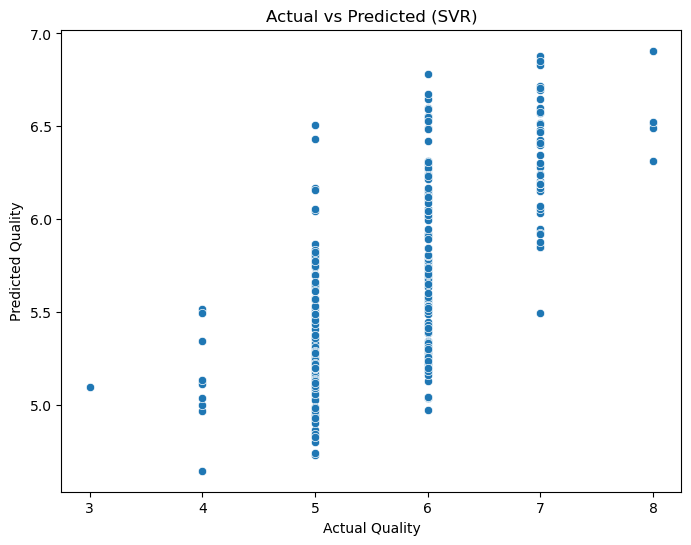

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted (SVR)")
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [25]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'epsilon': [0.1, 0.2, 0.5]
}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid.fit(X_train_scaled, y_train)

print("Best parameters:", grid.best_params_)
print("Best R² score (CV mean):", grid.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'C': 1, 'epsilon': 0.2, 'gamma': 0.1}
Best R² score (CV mean): 0.3710988281259118


In [26]:
best_svr = grid.best_estimator_
y_pred_best = best_svr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_best)
mae = mean_absolute_error(y_test, y_pred_best)
r2 = r2_score(y_test, y_pred_best)

print(f"New MSE: {mse:.4f}")
print(f"New MAE: {mae:.4f}")
print(f"New R2: {r2:.4f}")

New MSE: 0.3443
New MAE: 0.4614
New R2: 0.4731
